# Deep Learning Phishing Classifier

In [2]:
from fastai.tabular import *
from scipy.io import arff

Tabular data should be in a Pandas `DataFrame`.

In [106]:
path = Path('data/phishing')
input_data, input_meta = arff.loadarff(path/"Phishing_Legitimate_full.arff")
data_df = pd.DataFrame(input_data)

In [107]:
# Change ClASS_LABEL's column to binary
for col in data_df:
    if col == "CLASS_LABEL":
        temp = list(map(lambda x: int(x.decode('UTF-8')),data_df[col]))
        data_df[col] = temp

In [65]:
data_df.head()

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,3.0,1.0,5.0,72.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,-1.0,1.0,1
1,3.0,1.0,3.0,144.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,1.0,-1.0,1.0,1.0,1.0,1.0,1
2,3.0,1.0,2.0,58.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,-1.0,1.0,-1.0,0.0,1
3,3.0,1.0,6.0,79.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,-1.0,1.0,1.0,1.0,-1.0,1
4,3.0,0.0,4.0,46.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,-1.0,0.0,-1.0,-1.0,1


In [108]:
label = 'CLASS_LABEL'
cont_names = list(data_df.columns)[:48]
procs = [FillMissing, Normalize]

In [109]:
data_rand_df = data_df.reindex(np.random.permutation(data_df.index))

In [68]:
data_rand_df.head(10)

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
5094,2.0,1.0,0.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,-1.0,1.0,0
5731,3.0,1.0,1.0,67.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0
273,3.0,0.0,3.0,211.0,0.0,0.0,0.0,0.0,8.0,0.0,...,0.0,0.0,0.0,1.0,-1.0,-1.0,1.0,0.0,1.0,1
2814,3.0,0.0,3.0,45.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,1
1785,2.0,0.0,3.0,49.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,-1.0,1.0,0.0,1.0,1
5646,3.0,1.0,4.0,106.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,-1.0,1.0,1.0,0.0,1.0,0
7509,2.0,1.0,5.0,90.0,6.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,-1.0,-1.0,-1.0,0.0,1.0,0
3728,3.0,1.0,3.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,-1.0,1.0,-1.0,-1.0,1
9281,2.0,1.0,4.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0
8609,2.0,0.0,2.0,45.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0


In [110]:
dataset = (TabularList.from_df(data_rand_df, path=path, cont_names=cont_names, procs=procs )
                           .split_by_rand_pct()
                           .label_from_df(cols=label)
                           .databunch())

In [70]:
dataset.show_batch()

NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,NumNumericChars,NoHttps,RandomString,IpAddress,DomainInSubdomains,DomainInPaths,HttpsInHostname,HostnameLength,PathLength,QueryLength,DoubleSlashInPath,NumSensitiveWords,EmbeddedBrandName,PctExtHyperlinks,PctExtResourceUrls,ExtFavicon,InsecureForms,RelativeFormAction,ExtFormAction,AbnormalFormAction,PctNullSelfRedirectHyperlinks,FrequentDomainNameMismatch,FakeLinkInStatusBar,RightClickDisabled,PopUpWindow,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,target
0.4258,0.5729,-0.7023,0.2281,1.3471,-0.2585,-0.0158,-0.1164,-0.2906,-0.1207,-0.3430,-0.2498,-0.0475,0.1169,0.1090,0.9497,-0.1270,-0.1473,1.1598,0.0000,0.2862,0.5796,-0.3548,-0.0250,-0.2964,-0.2456,-0.5386,1.5823,-0.4531,0.4303,-0.5804,-0.3331,-0.2529,-0.3790,-0.5132,-0.0752,-0.1181,-0.0700,-0.3878,-0.7129,-0.1814,-0.1755,0.1718,-1.2435,-1.5329,0.3982,-1.5636,0.7617,0
-0.3237,-0.7960,-0.1691,0.4073,-0.5815,-0.2585,-0.0158,-0.1164,5.0255,-0.1207,-0.3430,-0.2498,-0.0475,0.1169,0.1090,0.9497,-0.1270,-0.1473,1.1598,0.0000,-0.8564,1.1872,-0.3548,-0.0250,-0.2964,-0.2456,-0.6364,-0.8185,-0.4531,0.4303,1.7228,-0.3331,-0.2529,-0.4381,-0.5132,-0.0752,-0.1181,-0.0700,-0.3878,-0.7129,-0.1814,-0.1755,0.1718,-1.2435,0.7212,0.3982,-0.2374,0.7617,0
-0.3237,0.5729,-0.7023,-0.8175,-0.5815,-0.2585,-0.0158,-0.1164,-0.2906,-0.1207,1.1532,0.6494,-0.0475,-0.6037,0.1090,-1.0528,-0.1270,-0.1473,1.1598,0.0000,-0.6025,-1.2026,0.2595,-0.0250,-0.2964,-0.2456,-0.2008,-0.1679,-0.4531,0.4303,1.7228,-0.3331,3.9535,-0.4381,-0.5132,-0.0752,-0.1181,-0.0700,-0.3878,1.4025,-0.1814,-0.1755,0.1718,1.1959,-0.4059,-3.3938,-0.2374,0.7617,0
0.4258,0.5729,-0.1691,0.1982,-0.2600,1.6351,-0.0158,-0.1164,-0.2906,-0.1207,-0.3430,-0.2498,-0.0475,-0.6037,-9.1704,0.9497,-0.1270,-0.1473,-0.8621,0.0000,3.0792,-0.3925,-0.3548,-0.0250,-0.2964,-0.2456,-0.7016,-1.0081,-0.4531,-2.3236,1.7228,-0.3331,-0.2529,-0.4381,-0.5132,-0.0752,-0.1181,-0.0700,-0.3878,-0.7129,-0.1814,-0.1755,0.1718,-1.2435,0.7212,0.3982,1.0888,0.7617,1
0.4258,-0.7960,-1.2355,0.2878,1.6685,-0.2585,-0.0158,-0.1164,-0.2906,-0.1207,-0.3430,-0.2498,-0.0475,0.0140,0.1090,0.9497,-0.1270,-0.1473,1.1598,0.0000,-0.4756,0.9037,-0.3548,-0.0250,-0.2964,-0.2456,-0.5953,-0.5371,-0.4531,0.4303,-0.5804,3.0019,-0.2529,-0.4150,-0.5132,-0.0752,-0.1181,-0.0700,-0.3878,-0.7129,-0.1814,-0.1755,0.1718,-1.2435,0.7212,-1.4978,-0.2374,0.7617,0


In [115]:
learn = tabular_learner(dataset, layers=[200,100], metrics=accuracy)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


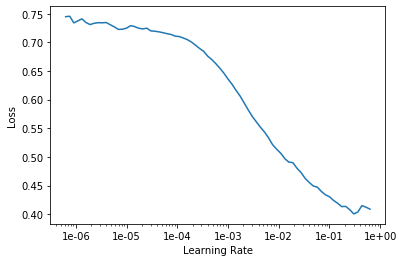

In [72]:
learn.lr_find()
learn.recorder.plot()

In [116]:
learn.fit_one_cycle(5, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.182892,0.124743,0.955000,00:01
1,0.134077,0.128019,0.959500,00:01
2,0.112900,0.087029,0.968000,00:01
3,0.079239,0.064970,0.978500,00:01
4,0.060068,0.064055,0.981500,00:01


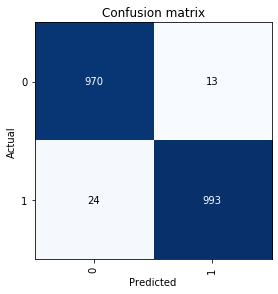

In [117]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

## Inference

In [118]:
row = data_rand_df.iloc[9000]

In [119]:
learn.predict(row)

(Category 0, tensor(0), tensor([0.9987, 0.0013]))